# Advanced plotting

This tutorial will go over more advanced plotting functionality. Before reading this, you should take a look at the basic analysis and plotting tutorial.  First, we'll load in some example data. This dataset is an `egg` comprised of 30 subjects, who each performed 8 study/test blocks of 16 words each.

In [1]:
import quail
%matplotlib inline
egg = quail.load_example_data()

/usr/local/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## Accuracy

In [2]:
accuracy = egg.analyze('accuracy')
accuracy.get_data().head()

0
Subject List        
0       0     0.5000
        1     0.5625
        2     0.1250
        3     0.5625
        4     0.3125

By default, the `analyze` function will perform an analysis on each list separately, so when you plot the result, it will plot a separate bar for each list, averaged over all subjects:

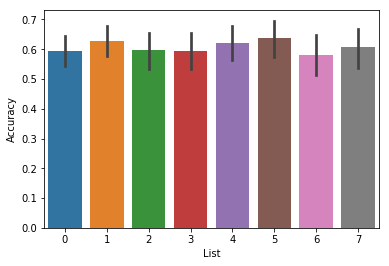

In [3]:
ax = accuracy.plot()

We can plot the accuracy for each subject by setting `plot_type='subject'`, and we can change the name of the subject grouping variable by setting the `subjname` kwarg:

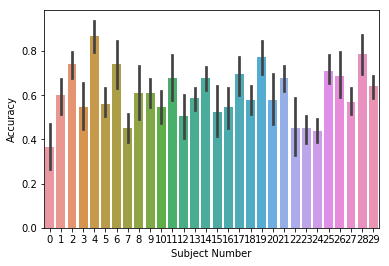

In [4]:
ax = accuracy.plot(plot_type='subject', subjname='Subject Number')

Furthermore, we can add a title using the `title` kwarg, and change the y axis limits using `ylim`:

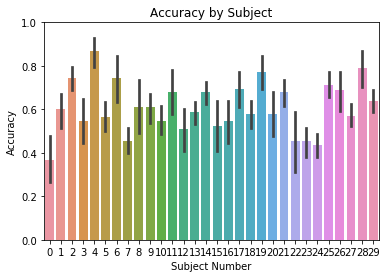

In [5]:
ax = accuracy.plot(plot_type='subject', subjname='Subject Number',
                title='Accuracy by Subject', ylim=[0,1])

In addition to bar plots, accuracy can be plotted as a violin or swarm plot by using the `plot_style` kwarg:

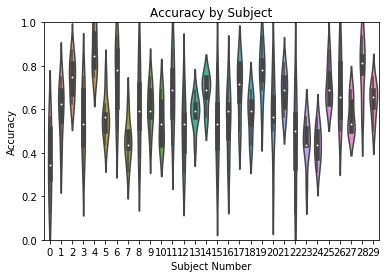

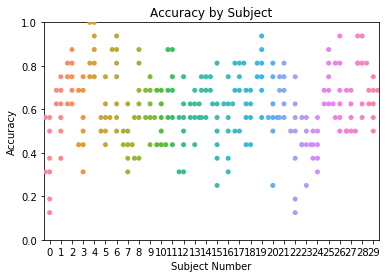

In [6]:
ax = accuracy.plot(plot_type='subject', subjname='Subject Number',
                title='Accuracy by Subject', ylim=[0,1], plot_style='violin')
ax = accuracy.plot(plot_type='subject', subjname='Subject Number',
                title='Accuracy by Subject', ylim=[0,1], plot_style='swarm')

We can also group the subjects.  This is useful in cases where you might want to compare analysis results across multiple experiments.  To do this we will reanalyze the data, averaging over lists within a subject, and then use the `subjgroup` kwarg to group the subjects into two sets:

In [7]:
accuracy = egg.analyze('accuracy', listgroup=['average']*8)
accuracy.get_data().head()

,,0
Subject,List,
0,average,0.367188
1,average,0.601562
2,average,0.742188
3,average,0.546875
4,average,0.867188


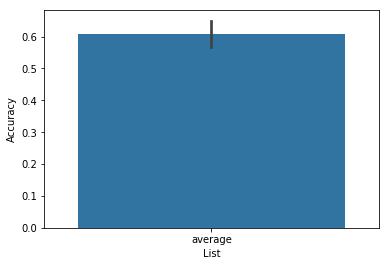

In [8]:
ax = accuracy.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15)

Oops, what happened there? By default, the `plot` function looks to the List column of the df to group the data.  To group according to subject group, we must tell the plot function to plot by `subjgroup`.  This can be achieved by setting `plot_type='subject'`:

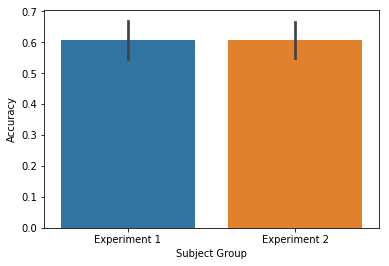

In [9]:
ax = accuracy.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='subject')

If you also have a list grouping (such as first 4 lists / second 4 lists), you can plot the interaction by setting `plot_type='split'`.  This will create a plot with respect to both the `subjgroup` and `listgroup`:

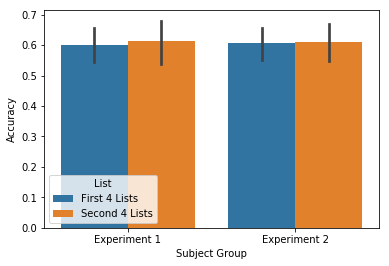

In [10]:
accuracy = egg.analyze('accuracy', listgroup=['First 4 Lists']*4+['Second 4 Lists']*4)
ax = accuracy.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='split')

Like above, these plots can also be violin or swarm plots:

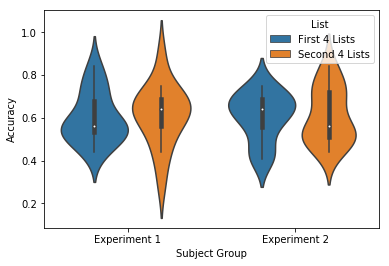

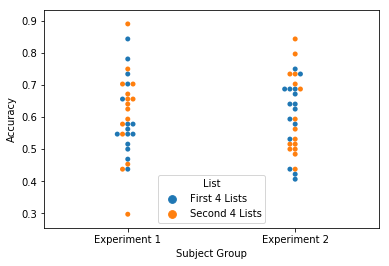

In [11]:
ax = accuracy.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='split', plot_style='violin')
ax = accuracy.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='split', plot_style='swarm')

## Memory fingerprints

The Memory Fingerprint plotting works exactly the same as the the accuracy plots, with the except that `plot_type='split'` only works for the accuracy plots, and the default `plot_style` is a violinplot, instead of a barplot.

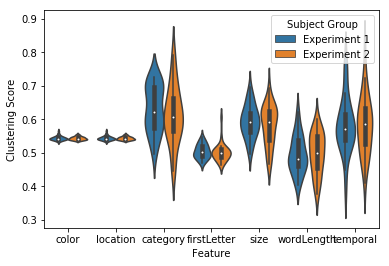

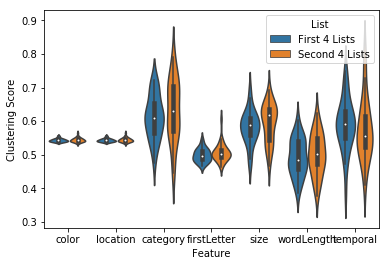

In [12]:
fingerprint = egg.analyze('fingerprint', listgroup=['First 4 Lists']*4+['Second 4 Lists']*4)
ax = fingerprint.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='subject')
ax = fingerprint.plot(subjgroup=['Experiment 1']*15+['Experiment 2']*15, plot_type='list')

## Other analyses

Like the plots above, spc, pfr and lagcrp plots can all be plotted according to `listgroup` or `subjgroup` by setting the `plot_type` kwarg.

### Plot by list grouping

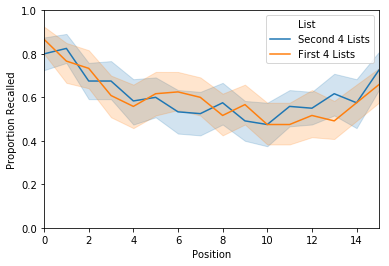

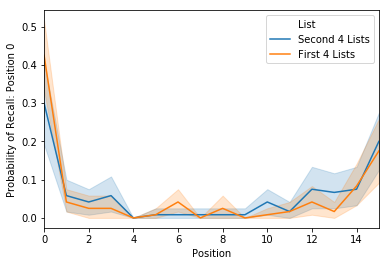

/Users/andrewheusser/Documents/github/quail/quail/analysis/lagcrp.py:129: RuntimeWarning: Mean of empty slice
  return np.nanmean(lagcrp, axis=0)


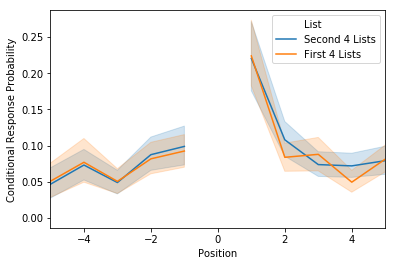

In [2]:
listgroup = ['First 4 Lists']*4+['Second 4 Lists']*4
plot_type = 'list'

spc = egg.analyze('spc', listgroup=listgroup)
ax = spc.plot(plot_type=plot_type, ylim=[0, 1])

pfr = egg.analyze('pfr', listgroup=listgroup)
ax = pfr.plot(plot_type=plot_type)

lagcrp = egg.analyze('lagcrp', listgroup=listgroup)
ax = lagcrp.plot(plot_type=plot_type)

### Plot by subject grouping

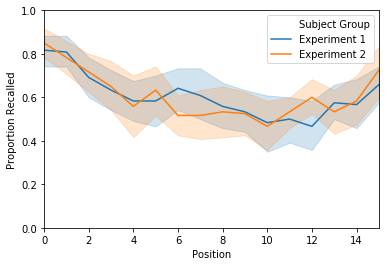

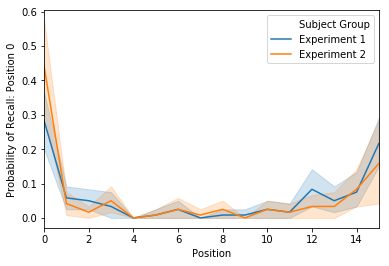

/Users/andrewheusser/Documents/github/quail/quail/analysis/lagcrp.py:129: RuntimeWarning: Mean of empty slice
  return np.nanmean(lagcrp, axis=0)


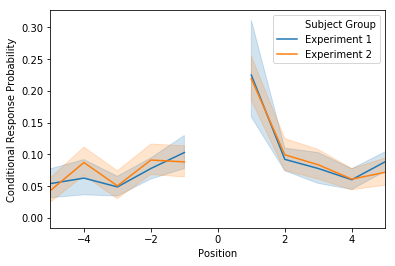

In [3]:
listgroup=['average']*8
subjgroup = ['Experiment 1']*15+['Experiment 2']*15
plot_type = 'subject'

spc = egg.analyze('spc', listgroup=listgroup)
ax = spc.plot(subjgroup=subjgroup, plot_type=plot_type, ylim=[0,1])

pfr = egg.analyze('pfr', listgroup=listgroup)
ax = pfr.plot(subjgroup=subjgroup, plot_type=plot_type)

lagcrp = egg.analyze('lagcrp', listgroup=listgroup)
ax = lagcrp.plot(subjgroup=subjgroup, plot_type=plot_type)